In [8]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Composite Quadratic Bezier Curve Example (Airfoil)
#   2015-08-12
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import numpy as np

#--- MAIN ---------------------------------------------------------------------+

def quadraticBezier(t,points):
    B_x=(1-t)*((1-t)*points[0][0]+t*points[1][0])+t*((1-t)*points[1][0]+t*points[2][0])
    B_y=(1-t)*((1-t)*points[0][1]+t*points[1][1])+t*((1-t)*points[1][1]+t*points[2][1])
    return B_x,B_y

def airfoil(ctlPts,numPts,write):
    curve=[]
    t=np.array([i*1/numPts for i in range(0,numPts)])
    
    # calculate first Bezier curve
    midX=(ctlPts[1][0]+ctlPts[2][0])/2
    midY=(ctlPts[1][1]+ctlPts[2][1])/2
    B_x0,B_y0=quadraticBezier(t,[ctlPts[0],ctlPts[1],[midX,midY]])
    curve=curve+list(zip(B_x0,B_y0))

    # calculate middle Bezier Curves
    for i in range(1,len(ctlPts)-3):
        p0=ctlPts[i]
        p1=ctlPts[i+1]
        p2=ctlPts[i+2]
        midX_1=(ctlPts[i][0]+ctlPts[i+1][0])/2
        midY_1=(ctlPts[i][1]+ctlPts[i+1][1])/2
        midX_2=(ctlPts[i+1][0]+ctlPts[i+2][0])/2
        midY_2=(ctlPts[i+1][1]+ctlPts[i+2][1])/2

        B_xi,B_yi=quadraticBezier(t,[[midX_1,midY_1],ctlPts[i+1],[midX_2,midY_2]])
        curve=curve+list(zip(B_xi,B_yi))                      
   
    # calculate last Bezier curve
    midX=(ctlPts[-3][0]+ctlPts[-2][0])/2
    midY=(ctlPts[-3][1]+ctlPts[-2][1])/2

    B_x1,B_y1=quadraticBezier(t,[[midX,midY],ctlPts[-2],ctlPts[-1]])
    curve=curve+list(zip(B_x1,B_y1))
    curve.append(ctlPts[-1])

    # write airfoil coordinates to text file
    if write:
        xPts,yPts=zip(*curve)
        f=open('testa.txt','w+')
        for i in range(len(xPts)):
            f.write(str(xPts[i])+','+str(yPts[i])+'\n')
        f.close()

    return curve

In [1]:
def file2cor(files_loc):
    '''this is to get the airfoil cordinates in list'''
    airfoil_cor = {}
    for airfoil, file in files_loc.items():
        #open files
        f = list(open(file, 'r'))
        # get rid of \n term and space
        cordinate = [(i.split('\n')[0]).split(' ')[2:] for i in f]
        cordinate = [list(filter(lambda x: len(x) > 0, cor)) for cor in cordinate]
        cordinate = [list(map(float, row)) for row in cordinate]
        #therefore this becomes [[x1, y1], [x2, y2], [x3, y3] ...]
        
        ''' don't convert object'''
        #put the generator back to the dictionary
        airfoil_cor[airfoil] = cordinate
        
    return airfoil_cor

In [38]:
airfoil = {'NACA4421': 'backup/NACA4421.txt', 'S813': 'backup/S813.txt'}
cor = file2cor(airfoil)

In [39]:
the = cor['NACA4421']

In [40]:
from sklearn.metrics import mean_squared_error

a = [[0,0], [0,0], [0,0]]
b = [[1,1], [2,2], [3,3]]
c = [[-1,-1], [-1,-1], [-1,-1]]
mean_squared_error(a,c)

1.0

set bezier curve function

input the airfoil cordinate

generate initial contral points

use STD to compare the curve section


In [41]:
points=np.array([[1.0, 0.0],
  [0.8827269908867382, 0.130369979082603],
  [0.6486593625764748, 0.11492366376332964],
  [0.5497639327653351, 0.1623378998671844],
  [0.30530263978258476, 0.23688970694942604],
  [0.20522929584780986, 0.14003161674652703],
  [0.034664407002372805, 0.07200232957300855],
  [-0.015244138214842495, -0.04816087293385616],
  [0.16643887971702626, -0.08195641825300887],
  [0.29805698428497884, -0.14388803443183465],
  [0.5094489249090266, -0.11564793865684689],
  [0.6822357215493822, -0.05118095354193316],
  [0.8651112649900059, -0.01977577966874216],
  [1.0, 0.0]])         # trailing edge (bottom)

In [42]:
xx = points[:, 0]

In [43]:
xx

array([ 1.        ,  0.88272699,  0.64865936,  0.54976393,  0.30530264,
        0.2052293 ,  0.03466441, -0.01524414,  0.16643888,  0.29805698,
        0.50944892,  0.68223572,  0.86511126,  1.        ])

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [45]:
t = np.arange(0, 1.1, .1)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [50]:
zero = cor['NACA4421'].index([0.0,0.0])
genesUp = (the[:zero])
genesDown = (the[zero+1:])

upX = [i[0] for i in genesUp][::-1]
upY = [i[1] for i in genesUp][::-1]
tck = interpolate.splrep(upX, upY, s=0)
Nx = xx[:6]
Ny = interpolate.splev(Nx, tck, der=0)

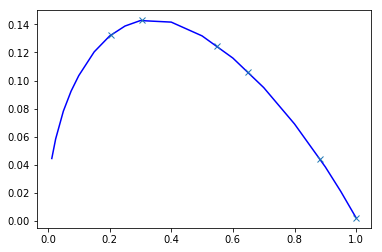

In [56]:
plt.figure()
plt.plot(upX, upY, 'b')
plt.plot(Nx, Ny, 'x')

In [52]:
Nx

array([ 1.        ,  0.88272699,  0.64865936,  0.54976393,  0.30530264,
        0.2052293 ])